In [5]:
import pandas as pd

wine=pd.read_csv("wine_csv_data.csv")

wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [6]:
wine.tail() # csv 끝 5개의 줄을 읽어옴

,alcohol,sugar,pH,class
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0
6496,11.8,0.8,3.26,1.0


In [7]:
wine.info() # 정보 요약
# 6497개 모두 결측지 값 없이, 정수 형태로 되어있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [8]:
wine.describe() # 샘플의 개수, 평균값, 표준편차, 최소값 등 통계정보 보여줌.
# 알코올 설탕 농도를 특징, 클래스를 정답(레이블) 로 보자

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [10]:
# 데이터 프레임에서 열 선택하기 -> 리스트형태로 넣으면됩니다.
input_data= wine[['alcohol', 'sugar', 'pH']] # pandas라 인식 가능. 변수가 아니라 문자열 임. 이 문자열이 갖고 있는 컬럼을 가져와라.
# 리스트형태로 넣어야 함.

# 제대로 되었는지
input_data.head(4)

,alcohol,sugar,pH
0,9.4,1.9,3.51
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16


In [81]:
target = wine['class'] # 정답 레이블 용 
print(type(target))
target.head(4)

<class 'pandas.core.series.Series'>


0    0.0
1    0.0
2    0.0
3    0.0
Name: class, dtype: float64

In [82]:
# 자료형 확인해보기
print(type(input_data)) # <class 'pandas.core.frame.DataFrame'>
print(type(target)) #   <class 'pandas.core.series.Series'>
# ??  target = wine[['class']] 이 아닌 target = wine['class'] 로 할경우 <class 'pandas.core.series.Series'>
# target = wine[['class']] 로 하면 <class 'numpy.ndarray'>

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [83]:
# numpy배열로 바꾸기
data = input_data.to_numpy() 
target = target.to_numpy() # 이상하게 target = wine['class'] 로 하면 오류뜸. ->>>이 셀을 여러번 코드 실행 시 오류뜸.
print(type(data)) # n-dimesion array : n차원 배열
print(type(target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# 학습용 데이터와 시험용 데이터로 쪼개기.

In [70]:
from sklearn.model_selection import train_test_split

# 데이터 쪼개기 : 학습용 / 시험용
# train_input, train_target : 학습용 데이터셋 + 레이블(정답)
# test_input, test_target : 시험용 데이터셋 + 레이블(정답)
train_input, test_input, train_target, test_target = train_test_split(data, target, random_state=42,test_size=0.2)



In [85]:
# 모양 확인하기 . numpy array 에 대해서만 작동ㅇ하는 shape.
print(train_input.shape)  # (5197, 3) 행,열
print(test_input.shape)

(5197, 3)
(1300, 3)
(1300,)


In [72]:
# z_score 계산하기.
from sklearn.preprocessing import StandardScaler # 표준 범위

ss=StandardScaler() # 객체 생성.

In [73]:
ss.fit(train_input) # 기본적인 통계 다 계산함.

train_scaled = ss.transform(train_input) # z-score로 변형시키고, 변형결과를 저장
test_scaled = ss.transform(test_input)



In [74]:
from sklearn.tree import DecisionTreeClassifier # 의사결정나무(마치 스무고개처럼 진행하는것, 분류/회귀 둘다 사용 가능?)

dt=DecisionTreeClassifier(random_state=42)
#학습 시키기 : 데이터 셋에 모델을 피팅시키기
dt.fit(train_scaled, train_target) # 문제와 정답 알려줘야함 -> 지도학습이라 그렇습니다.




DecisionTreeClassifier(random_state=42)

In [75]:
print("학습용 데이터 셋 : ",round(dt.score(train_scaled, train_target)*100,2))
print("시험용 데이터 셋 : ",round(dt.score(test_scaled, test_target)*100,2))

## 과대 적합 문제 발생. -> 학습용에 너무 피팅됨,
# 학습용 데이터 셋 :  99.69
# 시험용 데이터 셋 :  85.92

학습용 데이터 셋 :  99.69
시험용 데이터 셋 :  85.92


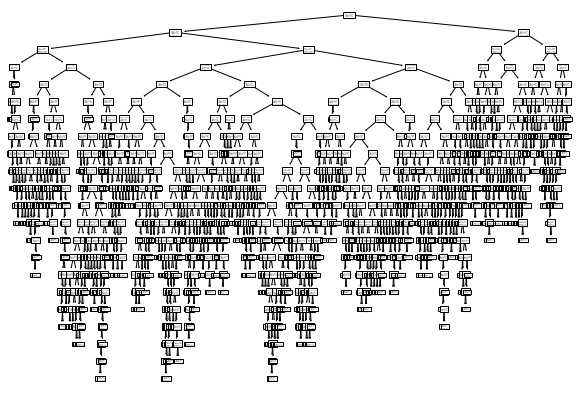

In [84]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7)) # figure 그림, 그래프. figsize : 그림,그래프 크기. 단위는 인치.
plot_tree(dt)
plt.show()

In [ ]:
# 리프 노드들이 마지막에 자라나있음.
# 루프 노드들은 위에 있음.
# 리프 노드들이 너무 많은 상황,

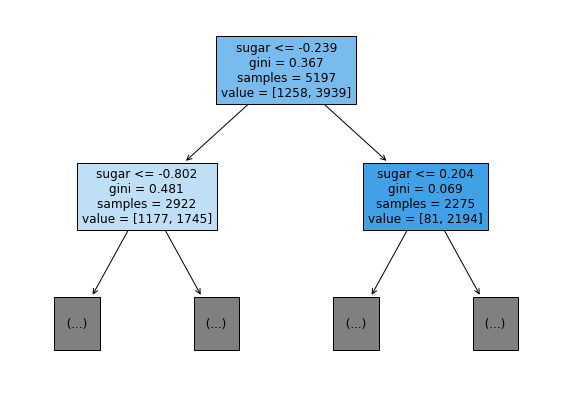

In [90]:
##  최대깊이를 정하여 의사결정나무 출력  max_depth
plt.figure(figsize=(10,7))
# figure 그림, 그래프. figsize : 그림,그래프 크기. 단위는 인치.
plot_tree(dt,max_depth=1,feature_names=['alcohol','sugar','pH]'],filled=True)
# filled : 색깔 칠하기.
plt.show()

In [ ]:
# x1은  feature. 사용하는 특징을 말함. feature_names를 통해 이름변경 가능

In [ ]:
# gini : 지니 불순도. ppt pg58~  / 
# 1-(클래스0의 비율 제곱+ 클래스 1의 비율제곱)

In [ ]:
# 노드에 하나의 클래스만 있다면 불순도는 0, 순수노드!
# 순수노드. 의사결정트리는 리프노드가 순수노드가 될떄까지 분류함.
# 부모노드와 자식노드의 불순도 차이가 가능한 크도록 모델을 성장시킴.

In [ ]:
## 과대적합문제 해결하기 -> 가지치기(pruning)
# 이번수업시간은 사전 가지치기를 실행함.



In [91]:
# 사전가지치기 max_depth.
dt = DecisionTreeClassifier(random_state=42, max_depth=3) 
dt.fit(train_scaled,train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [92]:
print("학습용 데이터 셋 : ",round(dt.score(train_scaled, train_target)*100,2))
print("시험용 데이터 셋 : ",round(dt.score(test_scaled, test_target)*100,2))

학습용 데이터 셋 :  84.55
시험용 데이터 셋 :  84.15


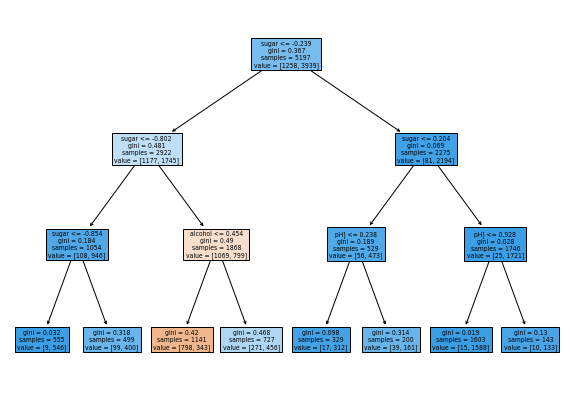

In [94]:
plt.figure(figsize=(10,7))
plot_tree(dt,feature_names=['alcohol','sugar','pH]'],filled=True)
plt.show()

In [ ]:
# 주황색계통이 레드와인
# 파란색 계통이 화이트 와인.

In [ ]:

# knn과 다르게 전처리가 필요없음 ㅅㄱ


In [95]:
# 전처리(스케일 변환) 적용 전(before)
dt= DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled,train_target)

# ss.fit(train_input)
# train_scaled = ss.transform(train_input)
# 으로 사용하였음

print("학습 : ",round(dt.score(train_scaled, train_target)*100,2))
print("시험 : ",round(dt.score(test_scaled, test_target)*100,2))

학습 :  84.55
시험 :  84.15


In [96]:
# 전처리(스케일 변환) 적용 후(before)

dt.fit(train_input,train_target)
print("학습 : ",round(dt.score(train_input, train_target)*100,2))
print("시험 : ",round(dt.score(test_input, test_target)*100,2))

# 스케일 적용 전과 후가 같음.

학습 :  84.55
시험 :  84.15


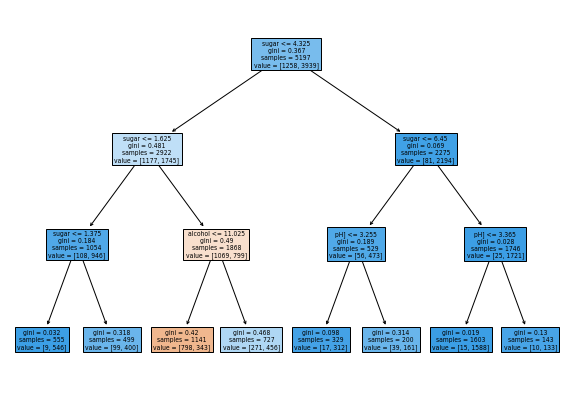

In [97]:
plt.figure(figsize=(10,7))
plot_tree(dt,feature_names=['alcohol','sugar','pH]'],filled=True)
plt.show()

In [ ]:
# 의사결정나무에서 스케일링을 적용하게되면 분명히 값은 양수인데 기준을 나눌때 음수가나오는경우도 잇음(스케일)
# 의사결정나무에서는 전처리과정없이 하는게 좋음.(설명할때 편함)

In [98]:
# 특성 중요도(feature importance) ppt pg 73
#  모두 더하면 1이 됩니다.
# 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산합니다.
# 활용하면 Decision Tree 모델을 특성 선택 (Feature Selection)에 활용할 수 있습니다.
# 이것이 Decision Tree 알고리즘의 또 다른 장점 중 하나입니다.
# 알코올, 설탕, 농도.
print(dt.feature_importances_)


# feautre selection(특성 선택)
# 중요한특성들을 골라 학습시키면 좀더 효율적으로 할 수 있음.

[0.12345626 0.86862934 0.0079144 ]
